In [138]:
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn import svm
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt
from numpy import random

In [139]:
data = pd.read_csv('../data/processed/sioma-inputs-output-unified_complete_28_weeks.csv', sep=',')
data.shape


(9752, 38)

In [140]:
data

,Luz (lux),Precipitación (ml),Temperatura (C),Velocidad del viento (Km/h),E,N,NE,NO,O,S,...,PORVL18N3,PORVL18N4,PORVL21N1,PORVL21N2,PORVL21N3,PORVL21N4,PORVL21N5,PORVL24N1,PORVL24N2,pesoRacimo
0,0.476135,0.000000,0.486758,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,...,0.971631,1.000000,1.000000,1.000000,1.000000,1.000000,0.825806,0.897436,1.000000,0.493524
1,0.000000,0.000000,0.185381,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,...,0.829787,0.685185,0.992537,0.949686,1.000000,0.891892,0.825806,0.685897,1.000000,0.207810
2,0.000000,0.000000,0.519597,0.030568,0.0,0.0,0.0,0.0,0.0,0.0,...,0.709220,0.453704,0.895522,0.685535,0.591463,0.547297,0.554839,0.538462,0.721805,0.131619
3,0.816777,0.000000,0.155720,0.071186,1.0,0.0,0.0,0.0,0.0,0.0,...,0.460993,0.231481,0.589552,0.477987,0.378049,0.229730,0.335484,0.038462,0.308271,0.398286
4,0.645003,0.000000,0.592691,0.142857,0.0,0.0,0.0,0.0,0.0,0.0,...,0.780142,0.564815,0.492537,0.421384,0.420732,0.547297,0.567742,0.391026,0.661654,0.388762
5,0.492464,0.000000,0.552966,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,...,0.687943,0.490741,0.500000,0.522013,0.567073,0.506757,0.677419,0.429487,0.601504,0.407810
6,0.000090,0.000000,0.129237,0.122807,0.0,0.0,0.0,1.0,0.0,0.0,...,0.822695,0.787037,0.597015,0.490566,0.615854,0.493243,0.754839,0.666667,0.819549,0.379238
7,0.000000,0.000000,0.238347,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,...,0.886525,0.777778,1.000000,1.000000,1.000000,1.000000,0.819355,0.769231,1.000000,0.426857
8,0.000000,0.000000,0.701801,0.022105,0.0,0.0,0.0,0.0,0.0,0.0,...,0.971631,1.000000,1.000000,1.000000,1.000000,1.000000,0.825806,0.897436,1.000000,0.179238
9,0.000000,0.000000,0.179025,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,...,0.723404,0.731481,0.604478,0.433962,0.621951,0.229730,0.709677,0.698718,0.759398,0.255429


Vemos que hay varios registros duplicados, porque se llenaron con el promedio de los otros cuando habia datos faltantes, entonces muchos de ellos obtuvieron un mismo valor. Detallamos cuales de ellos no se repiten y con esas muestras nos quedaremos.

In [141]:
data_without_duplicates = data.drop_duplicates(subset=['PORVL2N1'],keep="first")

In [142]:
data_without_duplicates

,Luz (lux),Precipitación (ml),Temperatura (C),Velocidad del viento (Km/h),E,N,NE,NO,O,S,...,PORVL18N3,PORVL18N4,PORVL21N1,PORVL21N2,PORVL21N3,PORVL21N4,PORVL21N5,PORVL24N1,PORVL24N2,pesoRacimo
0,0.476135,0.000000,0.486758,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,...,0.971631,1.000000,1.000000,1.000000,1.000000,1.000000,0.825806,0.897436,1.000000,0.493524
1,0.000000,0.000000,0.185381,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,...,0.829787,0.685185,0.992537,0.949686,1.000000,0.891892,0.825806,0.685897,1.000000,0.207810
2,0.000000,0.000000,0.519597,0.030568,0.0,0.0,0.0,0.0,0.0,0.0,...,0.709220,0.453704,0.895522,0.685535,0.591463,0.547297,0.554839,0.538462,0.721805,0.131619
3,0.816777,0.000000,0.155720,0.071186,1.0,0.0,0.0,0.0,0.0,0.0,...,0.460993,0.231481,0.589552,0.477987,0.378049,0.229730,0.335484,0.038462,0.308271,0.398286
4,0.645003,0.000000,0.592691,0.142857,0.0,0.0,0.0,0.0,0.0,0.0,...,0.780142,0.564815,0.492537,0.421384,0.420732,0.547297,0.567742,0.391026,0.661654,0.388762
5,0.492464,0.000000,0.552966,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,...,0.687943,0.490741,0.500000,0.522013,0.567073,0.506757,0.677419,0.429487,0.601504,0.407810
6,0.000090,0.000000,0.129237,0.122807,0.0,0.0,0.0,1.0,0.0,0.0,...,0.822695,0.787037,0.597015,0.490566,0.615854,0.493243,0.754839,0.666667,0.819549,0.379238
7,0.000000,0.000000,0.238347,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,...,0.886525,0.777778,1.000000,1.000000,1.000000,1.000000,0.819355,0.769231,1.000000,0.426857
8,0.000000,0.000000,0.701801,0.022105,0.0,0.0,0.0,0.0,0.0,0.0,...,0.971631,1.000000,1.000000,1.000000,1.000000,1.000000,0.825806,0.897436,1.000000,0.179238
9,0.000000,0.000000,0.179025,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,...,0.723404,0.731481,0.604478,0.433962,0.621951,0.229730,0.709677,0.698718,0.759398,0.255429


Son 8877 registros sin repetir, con este numero de muestras nos quedaremos. 

In [143]:
data_without_duplicates.shape

(314, 38)

In [144]:
data = np.array(data)
data.shape

(9752, 38)

In [149]:
# col=['tr']
#data_pd = pd.DataFrame(data, columns=col)

In [151]:
# Tomamos esa cantidad de 8877  como totalidad de los datos incluido el pesoracimo
# 
# Vemos qe data tiene 9752 registros pero seleccionaremos manualmente con slices
# hasta el registro 8877

data_complete = data[0:8877,0:37]
#train.tofile('train.csv')
print('100% de los datos - data:',data.shape)
# print(data_complete)
# 80% de los datos
train = data[0:7101,0:38]
print('80% de los datos - train:',train.shape)

# y_train tomo el mismo 80% de los datos solo para la variabe explicativa pesoracimo
y_train = train[0:7101,38]
#print(y_train.shape)

# y_train=y_train.reshape(-1,1)
#print(y_train)
#y_train.tofile('y_train2.csv', sep=',')


#20% de los datos
#test   = data[7102:8877,0:37]
#y_test = data[7102:8877,37]
#print('Testing 20% de los datos',test.shape)
#print(y_test.shape)

#Cuando consideramos el conjunto de validacion 10% de los datos:

#validation   = data[4893:5505,0:37]
#print('Validacion 10% de los datos', validation.shape)
#y_validation = data[4893:5505,37]

#print(y_validation.shape)

#test2   = data[5505:6116,0:37]
#y_test2 = data[5505:6116,37]


100% de los datos - data: (9752, 38)
80% de los datos - train: (7101, 38)


IndexError: index 38 is out of bounds for axis 1 with size 38

In [47]:
def ErrorPorcentualPromedio(y_real,y_estimado):
  n = len(y_real)
  count = 0
  error = 0
  for i in range(n):
    if y_real[i]!=0:
      aux = 100* np.abs(y_real[i]- y_estimado[i])/ y_real[i]
      error = error + aux
      count = count + 1
  error = error/count
  return error

def ECM(y_real,y_estimado):
  n = len(y_real)
  error = 0
  for i in range(n):
    error = error + (y_real[i]- y_estimado[i])**2
  error = error/n
  return error

# Decision Tree

In [48]:
def ArbolDecision(train, train_y):
    reg = tree.DecisionTreeRegressor()
    reg.fit(train, train_y)
    return reg
  
def ArbolDecision2(train, train_y, Met, imp):
    reg = tree.DecisionTreeRegressor(criterion = Met,min_impurity_decrease = imp)
    reg.fit(train, train_y)
    return reg

In [61]:
Modelo_Arbol = ArbolDecision(train,y_train)
Prediccion = Modelo_Arbol.predict(test)

EPP_Arbol = ErrorPorcentualPromedio(y_test,Prediccion)
print('El error porcentual promedio para Arbol de Decisión es: '+str(EPP_Arbol)+'%')

El error porcentual promedio para Arbol de Decisión es: 38.86557014660136%


In [62]:
Modelo_Arbol.score(test, y_test, sample_weight=None)

-1.2333080303215123

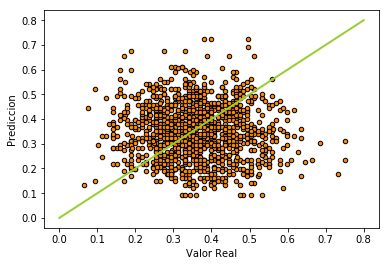

In [63]:
plt.scatter(y_test, Prediccion, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot([0,0.8], [0,0.8], color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("Valor Real")
plt.ylabel("Prediccion")
plt.savefig('Arbol1.png')

# Vamos a variar los hiperparámetros

In [65]:
Metodo = ['friedman_mse','mae']
impurity = np.array([0.1,0.2,0.3,0.4,0.5])

In [66]:
salidas = pd.DataFrame()
for i in Metodo:
  for j in impurity:
    Modelo_Arbol2 = ArbolDecision2(train,y_train,i,j)
    Prediccion = Modelo_Arbol2.predict(validation)
    EPP_Arbol = ErrorPorcentualPromedio(y_validation,Prediccion)
    ECM_Arbol = ECM(y_validation,Prediccion)
    resultados = np.array([EPP_Arbol,ECM_Arbol])
    salidas = salidas.append(pd.DataFrame(resultados))
salidas.to_csv('Salida_Arbol.csv')

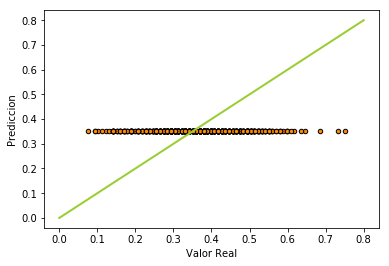

In [67]:
Prediccion2 = Modelo_Arbol2.predict(test2)
EPP_Arbol2 = ErrorPorcentualPromedio(y_test2,Prediccion2)
ECM_Arbol2 = ECM(y_test2,Prediccion2)

plt.scatter(y_test2, Prediccion2, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot([0,0.8], [0,0.8], color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("Valor Real")
plt.ylabel("Prediccion")
plt.savefig('Arbol2.png')

En vista que todos los modelos que corresponden al criterio "mae" proveen un mejor ajuste en término de error, podemos evaluar el conjunto de prueba en cualquiera de estos modelos

In [68]:
print(EPP_Arbol2)
print(ECM_Arbol2)

28.536053320550604
0.01165390195619982


# Máquinas de Soporte Vectorial

In [69]:
def SVMR(train, train_y, Kernel = 'linear', polyd = 3):
  reg = svm.SVR(kernel = Kernel, degree = polyd)
  reg.fit(train, train_y)
  return reg

/home/bgarcial/.virtualenvs/sioma/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/bgarcial/.virtualenvs/sioma/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/bgarcial/.virtualenvs/sioma/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/bgarcial/.virtua

EPP SVM1 con mejor Kernel
28.63770265310826
ECM SVM1 con mejor Kernel
0.011608384240007584


/home/bgarcial/.virtualenvs/sioma/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


EPP SVM2 con mejor Kernel
28.81151336078782
ECM SVM2 con mejor Kernel
0.011543131385046434


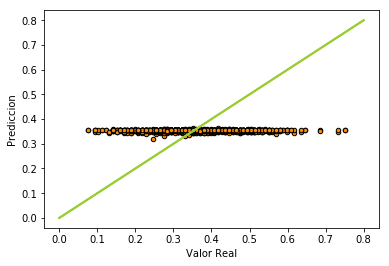

In [70]:
Kernels = np.array(['linear', 'poly', 'rbf', 'sigmoid'])
polydg  = range(2,7)

SVMRerrors = np.zeros((len(Kernels), 2))
bestPoly   = ''

for e, k in enumerate(Kernels):
  if k != 'poly':
    SVMR_Model = SVMR(train, y_train, str(k))
    Prediccion = SVMR_Model.predict(validation)
    EPP_SVM    = ErrorPorcentualPromedio(y_validation, Prediccion)
    ECM_SVM    = ECM(y_validation,Prediccion)
    SVMRerrors[e, 0] = EPP_SVM
    SVMRerrors[e, 1] = ECM_SVM
  else:
    minECM_Poly = np.inf
    for dp in polydg:
      SVMR_Model = SVMR(train, y_train, str(k), dp)
      Prediccion = SVMR_Model.predict(validation)
      ECM_SVM    = ECM(y_validation,Prediccion)
      EPP_SVM    = ErrorPorcentualPromedio(y_validation, Prediccion)
      if ECM_SVM < minECM_Poly:
        minECM_Poly = ECM_SVM
        minEPP_Poly = EPP_SVM
        bestPoly    = dp
        
    SVMRerrors[e, 0] = minEPP_Poly
    SVMRerrors[e, 1] = minECM_Poly

bestKernelEPP = str(Kernels[np.argmin(SVMRerrors[:, 0])])
bestKernelECM = str(Kernels[np.argmin(SVMRerrors[:, 1])])

if bestKernelEPP == bestKernelECM:
  SVMR_Model = SVMR(train, y_train, bestKernelEPP, bestPoly)
  Prediccion = SVMR_Model.predict(test2)
  EPP_BSVM = ErrorPorcentualPromedio(y_test2,Prediccion)
  ECM_BSVM = ECM(y_test2,Prediccion)
  
  print('EPP SVM con mejor Kernel')
  print(EPP_BSVM)
  print('ECM SVM con mejor Kernel')
  print(ECM_BSVM)
  
  plt.scatter(y_test2, Prediccion, s=20, edgecolor="black", c="darkorange", label="data")
  plt.plot([0,0.8], [0,0.8], color="yellowgreen", label="max_depth=5", linewidth=2)
  plt.xlabel("Valor Real")
  plt.ylabel("Prediccion")
  plt.savefig('SVM1.png')

else:
  # Modelo con mejor EPP
  SVMR_Model = SVMR(train, y_train, bestKernelEPP, bestPoly)
  Prediccion = SVMR_Model.predict(test2)
  EPP_BSVM = ErrorPorcentualPromedio(y_test2,Prediccion)
  ECM_BSVM = ECM(y_test2,Prediccion)
  
  print('EPP SVM1 con mejor Kernel')
  print(EPP_BSVM)
  print('ECM SVM1 con mejor Kernel')
  print(ECM_BSVM)
  
  plt.scatter(y_test2, Prediccion, s=20, edgecolor="black", c="darkorange", label="data")
  plt.plot([0,0.8], [0,0.8], color="yellowgreen", label="max_depth=5", linewidth=2)
  plt.xlabel("Valor Real")
  plt.ylabel("Prediccion")
  plt.savefig('SVM1.png')
  
  # Modelo con mejor ECM
  SVMR_Model = SVMR(train, y_train, bestKernelECM, bestPoly)
  Prediccion = SVMR_Model.predict(test2)
  EPP_BSVM = ErrorPorcentualPromedio(y_test2,Prediccion)
  ECM_BSVM = ECM(y_test2,Prediccion)
  
  print('EPP SVM2 con mejor Kernel')
  print(EPP_BSVM)
  print('ECM SVM2 con mejor Kernel')
  print(ECM_BSVM)
  
  plt.scatter(y_test2, Prediccion, s=20, edgecolor="black", c="darkorange", label="data")
  plt.plot([0,0.8], [0,0.8], color="yellowgreen", label="max_depth=5", linewidth=2)
  plt.xlabel("Valor Real")
  plt.ylabel("Prediccion")
  plt.savefig('SVM2.png')


# Red Neuronal

In [71]:
def ANN(train, train_y, hidden_layer, activationFun):
  reg = MLPRegressor(hidden_layer_sizes = hidden_layer, activation = activationFun)
  reg.fit(train, train_y)
  return reg

EPP ANN
28.942403628002637
ECM ANN
0.011546732046258985


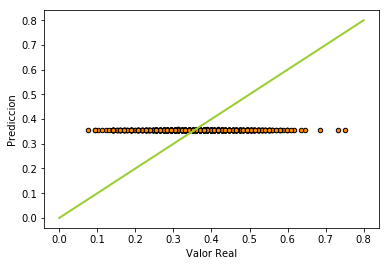

In [72]:
actFunctions = np.array(['logistic', 'tanh', 'relu'])

hl = np.array([[     (5,),        (10,),        (15,)],
               [   (5, 5),     (10, 10),     (15, 15)],
               [(5, 5, 5), (10, 10, 10), (15, 15, 15)]])


EPPRN = np.zeros((len(actFunctions), hl.shape[0], hl.shape[1]))
ECMRN = np.zeros((len(actFunctions), hl.shape[0], hl.shape[1]))

for e1, ac in enumerate(actFunctions):
  for e2, h in enumerate(hl):
    for e3, hdl in enumerate(h):
      ANN_Model  = ANN(train, y_train, hdl, ac)
      Prediccion = ANN_Model.predict(validation)
      EPPRN[e1, e2, e3] = ErrorPorcentualPromedio(y_validation, Prediccion)
      ECMRN[e1, e2, e3] = ECM(y_validation, Prediccion)
      

bestEPPLog  = np.min(EPPRN[0,:,:])
bestECMLog  = np.min(ECMRN[0,:,:])
argbestLog  = hl[np.unravel_index(ECMRN[0,:,:].argmin(), ECMRN[0,:,:].shape)]

bestEPPTan  = np.min(EPPRN[1,:,:])
bestECMTan  = np.min(ECMRN[1,:,:])
argbestTan  = hl[np.unravel_index(ECMRN[1,:,:].argmin(), ECMRN[1,:,:].shape)]

bestEPPRelu = np.min(EPPRN[2,:,:])
bestECMRelu = np.min(ECMRN[2,:,:])
argbestRelu = hl[np.unravel_index(ECMRN[2,:,:].argmin(), ECMRN[2,:,:].shape)]

bestECMFun = actFunctions[np.argmin((bestECMLog, bestECMTan, bestECMRelu))]

if bestECMFun == actFunctions[0]:
  argbesthl = argbestLog
elif bestECMFun == actFunctions[1]:
  argbesthl = argbestTan
else:
  argbesthl = argbestRelu

bestANN    = ANN(train, y_train, argbesthl, bestECMFun)
Prediccion = bestANN.predict(test2)

EPP_BANN = ErrorPorcentualPromedio(y_test2,Prediccion)
ECM_BANN = ECM(y_test2,Prediccion)

print('EPP ANN')
print(EPP_BANN)
print('ECM ANN')
print(ECM_BANN)

plt.scatter(y_test2, Prediccion, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot([0,0.8], [0,0.8], color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("Valor Real")
plt.ylabel("Prediccion")
plt.savefig('ANN.png')

In [52]:
sioma_data = pd.read_csv('../data/processed/sioma-inputs-output-unified_training_28_weeks.csv', sep=',')
sioma_data = np.array(sioma_data)
sioma_data.shape

(7801, 38)